         date  value
0  2010-10-01   0.19
1  2010-11-01   0.19
2  2010-12-01   0.18
3  2011-01-01   0.17
4  2011-02-01   0.16


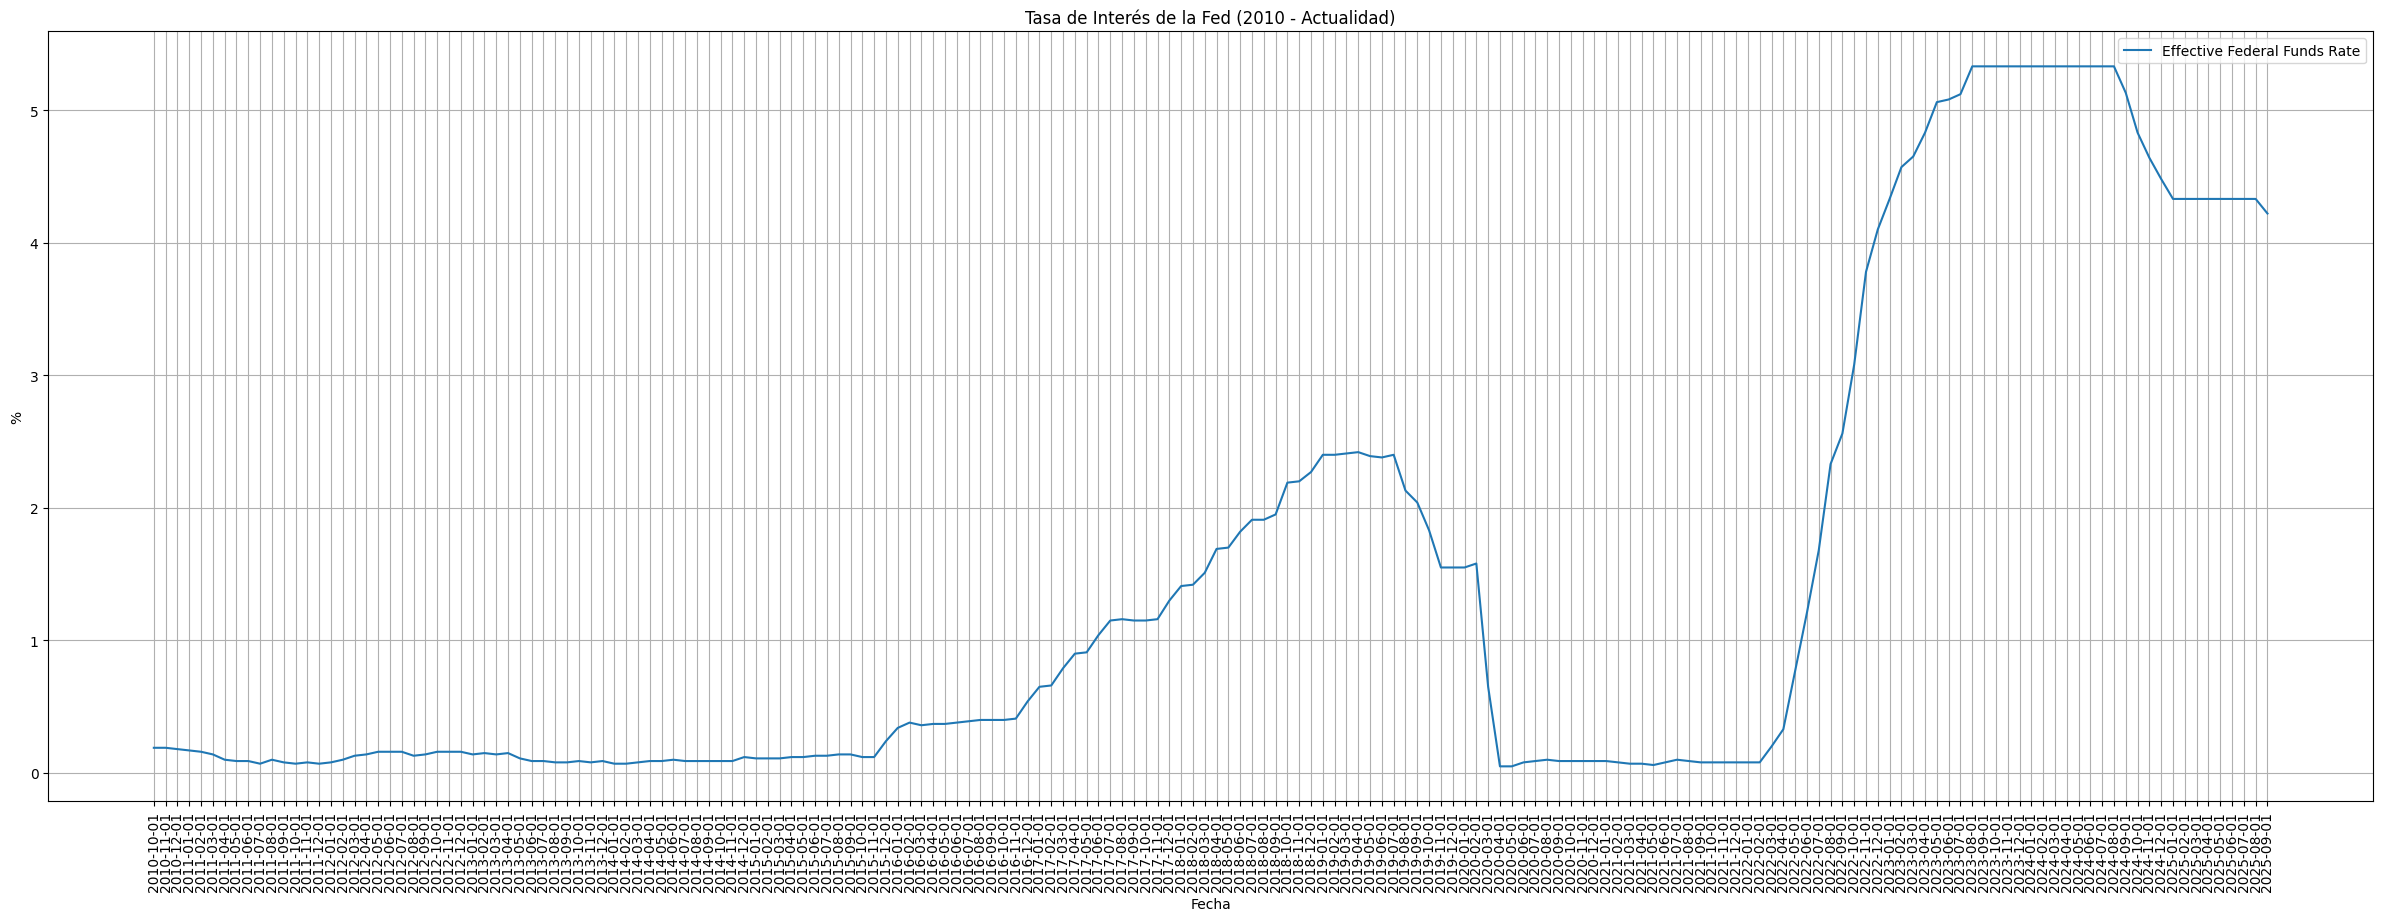

In [1]:
#Tasas de interes de la FED de forma mensual desde el 01/10/2010
import requests
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata

api_key = userdata.get('key')

base_url = "https://api.stlouisfed.org/fred/series/observations"
series_id = "FEDFUNDS"

params = {
    "series_id": series_id,
    "api_key": api_key,
    "file_type": "json",
    "observation_start": "2010-10-01",
    "frequency": "m"
}

response = requests.get(base_url, params=params)
data = response.json()

df = pd.DataFrame(data["observations"])
df = df[["date", "value"]]
df["value"] = pd.to_numeric(df["value"], errors="coerce")
print(df.head())

plt.figure(figsize=(30,10))
plt.plot(df["date"], df["value"], label="Effective Federal Funds Rate")
plt.title("Tasa de Interés de la Fed (2010 - Actualidad)")
plt.xlabel("Fecha")
plt.ylabel("%")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()




                               Close
Date                                
2010-10-01 00:00:00-04:00  80.010155
2010-11-01 00:00:00-04:00  82.791229
2010-12-01 00:00:00-05:00  84.517937
2011-01-01 00:00:00-05:00  89.203072
2011-02-01 00:00:00-05:00  91.751289


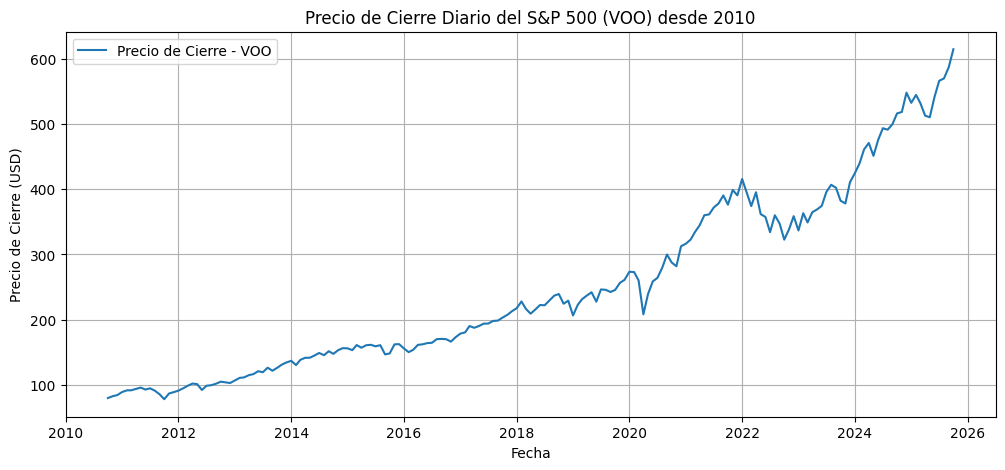

In [2]:
#SP500 desde el 2010
import yfinance as yf

ticker_symbol = "VOO"
ticker = yf.Ticker(ticker_symbol)


historical_data = ticker.history(start='2010-10-01')
close_prices = historical_data[["Close"]]
month_close_VOO = close_prices.resample("MS").first() #MS Month start / ME Month end
print(month_close_VOO.head(5))

plt.figure(figsize=(12,5))
plt.plot(month_close_VOO.index, month_close_VOO["Close"], label="Precio de Cierre - VOO")
plt.title("Precio de Cierre Diario del S&P 500 (VOO) desde 2010")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.legend()
plt.grid(True)
plt.show()

                               Close
Date                                
2010-10-01 00:00:00-04:00  30.258650
2010-11-01 00:00:00-04:00  31.038553
2010-12-01 00:00:00-05:00  30.743626
2011-01-01 00:00:00-05:00  32.418461
2011-02-01 00:00:00-05:00  31.665009


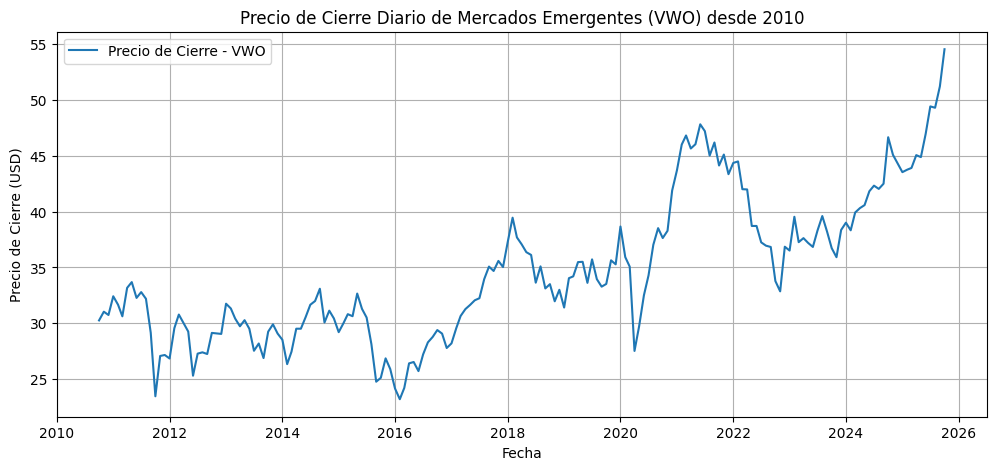

In [3]:
#VWO desde el 2010
ticker_symbol = "VWO"
ticker = yf.Ticker(ticker_symbol)


historical_data = ticker.history(start='2010-10-01')
close_prices = historical_data[["Close"]]
month_close_VWO = close_prices.resample("MS").first() #MS Month start / ME Month end
print(month_close_VWO.head(5))


plt.figure(figsize=(12,5))
plt.plot(month_close_VWO.index, month_close_VWO["Close"], label="Precio de Cierre - VWO")
plt.title("Precio de Cierre Diario de Mercados Emergentes (VWO) desde 2010")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
month_close_VOO = month_close_VOO.reset_index()
month_close_VWO = month_close_VWO.reset_index()
#Les cambio el nombre antes
month_close_VOO = month_close_VOO.rename(columns={"Close": "VOO"})
month_close_VWO = month_close_VWO.rename(columns={"Close": "VWO"})
#Union de los dataframes
VOO_VWO = pd.merge(month_close_VOO, month_close_VWO, on="Date")
print("VOO y VWO juntos")
print(VOO_VWO.head(5))

#Procesamiento con la forma en que estan las fechas
VOO_VWO["Date"] = pd.to_datetime(VOO_VWO["Date"]).dt.tz_localize(None)
print("VOO y VWO juntos con fecha formateada")
print(VOO_VWO.head(5))

df = df.rename(columns={"date": "Date"})
df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)

FED_VOO_VWO = pd.merge(df, VOO_VWO, on="Date")
print("Tasas de interes, VOO y VWO juntos")
print(FED_VOO_VWO.head(10))

VOO y VWO juntos
                       Date        VOO        VWO
0 2010-10-01 00:00:00-04:00  80.010155  30.258650
1 2010-11-01 00:00:00-04:00  82.791229  31.038553
2 2010-12-01 00:00:00-05:00  84.517937  30.743626
3 2011-01-01 00:00:00-05:00  89.203072  32.418461
4 2011-02-01 00:00:00-05:00  91.751289  31.665009
VOO y VWO juntos con fecha formateada
        Date        VOO        VWO
0 2010-10-01  80.010155  30.258650
1 2010-11-01  82.791229  31.038553
2 2010-12-01  84.517937  30.743626
3 2011-01-01  89.203072  32.418461
4 2011-02-01  91.751289  31.665009
Tasas de interes, VOO y VWO juntos
        Date  value        VOO        VWO
0 2010-10-01   0.19  80.010155  30.258650
1 2010-11-01   0.19  82.791229  31.038553
2 2010-12-01   0.18  84.517937  30.743626
3 2011-01-01   0.17  89.203072  32.418461
4 2011-02-01   0.16  91.751289  31.665009
5 2011-03-01   0.14  91.874092  30.624838
6 2011-04-01   0.10  93.904503  33.171906
7 2011-05-01   0.09  96.001610  33.685310
8 2011-06-01   0.09  9

In [5]:
#Calculo del cambio porcentual
FED_VOO_VWO["VOO_%_change"] = FED_VOO_VWO["VOO"].pct_change().mul(100)
FED_VOO_VWO["VWO_%_change"] = FED_VOO_VWO["VWO"].pct_change().mul(100)
print(FED_VOO_VWO.head(10))

        Date  value        VOO        VWO  VOO_%_change  VWO_%_change
0 2010-10-01   0.19  80.010155  30.258650           NaN           NaN
1 2010-11-01   0.19  82.791229  31.038553      3.475902      2.577456
2 2010-12-01   0.18  84.517937  30.743626      2.085616     -0.950198
3 2011-01-01   0.17  89.203072  32.418461      5.543362      5.447748
4 2011-02-01   0.16  91.751289  31.665009      2.856648     -2.324146
5 2011-03-01   0.14  91.874092  30.624838      0.133843     -3.284921
6 2011-04-01   0.10  93.904503  33.171906      2.209993      8.317000
7 2011-05-01   0.09  96.001610  33.685310      2.233234      1.547710
8 2011-06-01   0.09  92.979385  32.271774     -3.148098     -4.196298
9 2011-07-01   0.07  94.903206  32.791847      2.069083      1.611541


# **Analisis de datos**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Solo variables que me interesan del dataframe
columnas_de_interes = ['value', 'VOO_%_change', 'VWO_%_change']
df_enfocado = FED_VOO_VWO[columnas_de_interes]


matriz_correlacion = df_enfocado.corr()

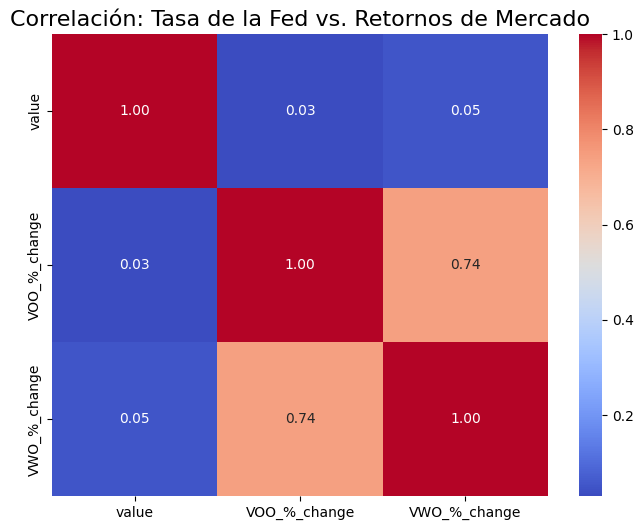

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlación: Tasa de la Fed vs. Retornos de Mercado', fontsize=16)
plt.show()

En un periodo de casi 15 años parece haber poca correlacion. Practicamente 0. Aunque si afecta ligeramente mas en mercados emergentes

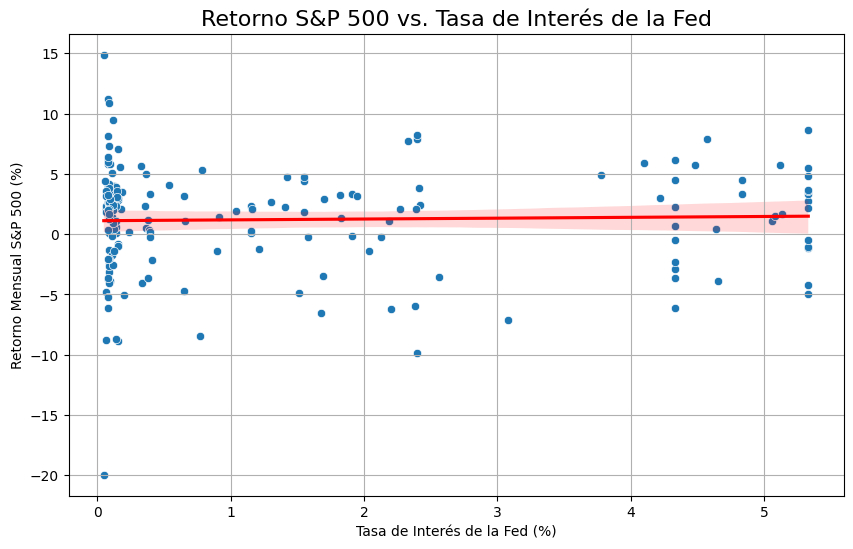

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='VOO_%_change', data=FED_VOO_VWO)
sns.regplot(x='value', y='VOO_%_change', data=FED_VOO_VWO, scatter=False, color='red')

plt.title('Retorno S&P 500 vs. Tasa de Interés de la Fed', fontsize=16)
plt.xlabel('Tasa de Interés de la Fed (%)')
plt.ylabel('Retorno Mensual S&P 500 (%)')
plt.grid(True)
plt.show()

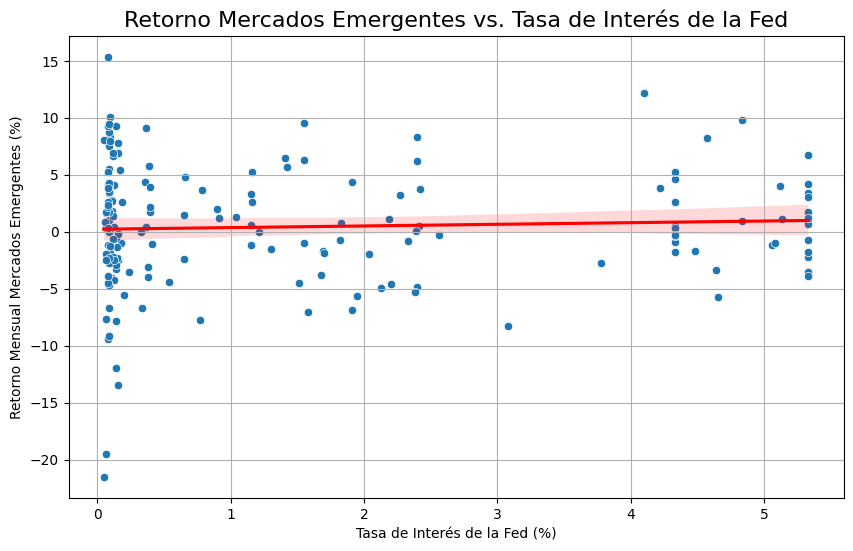

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='VWO_%_change', data=FED_VOO_VWO)
sns.regplot(x='value', y='VWO_%_change', data=FED_VOO_VWO, scatter=False, color='red')

plt.title('Retorno Mercados Emergentes vs. Tasa de Interés de la Fed', fontsize=16)
plt.xlabel('Tasa de Interés de la Fed (%)')
plt.ylabel('Retorno Mensual Mercados Emergentes (%)')
plt.grid(True)
plt.show()

Con esto se puede confirmar que no hay una correlacion fuerte como para sacar conclusiones aun.

In [10]:
# Tasas bajas, cercanas a 0
periodo_1 = FED_VOO_VWO[(FED_VOO_VWO['Date'] >= '2010-10-01') & (FED_VOO_VWO['Date'] < '2015-12-01')]
# Subida de tasas hasta cerca del 2,5%
periodo_2 = FED_VOO_VWO[(FED_VOO_VWO['Date'] >= '2015-12-01') & (FED_VOO_VWO['Date'] < '2019-08-01')]
# Bajada de tasas por la pandemia
periodo_3 = FED_VOO_VWO[(FED_VOO_VWO['Date'] >= '2019-08-01') & (FED_VOO_VWO['Date'] < '2022-03-01')]
# Nuevamente subida de tasas
periodo_4 = FED_VOO_VWO[(FED_VOO_VWO['Date'] >= '2022-03-01')]

# Recalculamos las correlaciones
corr_p1 = periodo_1[['value', 'VOO_%_change', 'VWO_%_change']].corr().loc['value']
corr_p2 = periodo_2[['value', 'VOO_%_change', 'VWO_%_change']].corr().loc['value']
corr_p3 = periodo_3[['value', 'VOO_%_change', 'VWO_%_change']].corr().loc['value']
corr_p4 = periodo_4[['value', 'VOO_%_change', 'VWO_%_change']].corr().loc['value']

# Creamos el DataFrame de resultados
resultados = pd.DataFrame({
    'Periodo 1 (Tasas Bajas)': corr_p1,
    'Periodo 2 (Alzas Lentas)': corr_p2,
    'Periodo 3 (Pandemia y Bajada)': corr_p3,
    'Periodo 4 (Alzas Abruptas)': corr_p4,
}).drop('value')

print(resultados)

              Periodo 1 (Tasas Bajas)  Periodo 2 (Alzas Lentas)  \
VOO_%_change                 0.047454                   0.00992   
VWO_%_change                 0.012849                  -0.06486   

              Periodo 3 (Pandemia y Bajada)  Periodo 4 (Alzas Abruptas)  
VOO_%_change                      -0.064291                    0.316613  
VWO_%_change                      -0.099477                    0.353176  


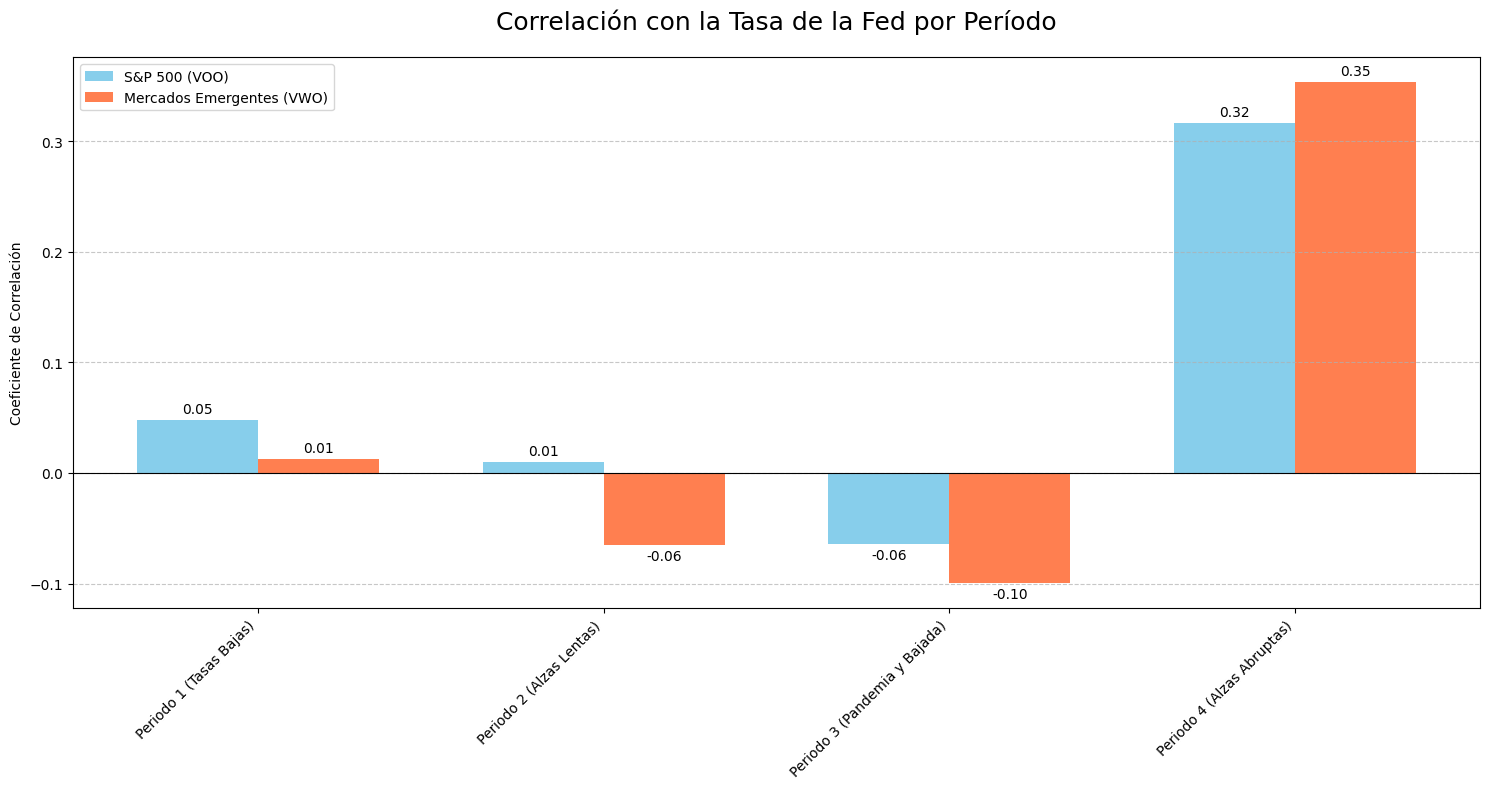

In [11]:
import numpy as np


resultados.index = ['S&P 500 (VOO)', 'Mercados Emergentes (VWO)']

# para que los períodos estén en el eje X
resultados_t = resultados.transpose()


fig, ax = plt.subplots(figsize=(15, 8))


x = np.arange(len(resultados_t.index))
width = 0.35


rects1 = ax.bar(x - width/2, resultados_t['S&P 500 (VOO)'], width, label='S&P 500 (VOO)', color='skyblue')
rects2 = ax.bar(x + width/2, resultados_t['Mercados Emergentes (VWO)'], width, label='Mercados Emergentes (VWO)', color='coral')


ax.set_ylabel('Coeficiente de Correlación')
ax.set_title('Correlación con la Tasa de la Fed por Período', fontsize=18, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(resultados_t.index, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)


ax.axhline(0, color='black', linewidth=0.8)

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()
plt.show()

Lo que continua es para pasarlo a power bi

In [12]:
datos_series_tiempo = FED_VOO_VWO.reset_index()
datos_series_tiempo.to_csv('fed_market_timeseries.csv', index=False)

In [13]:
resultados_t = resultados.transpose().reset_index()
resultados_t = resultados_t.rename(columns={
    'index': 'Periodo',
    'S&P 500 (VOO)': 'Correlacion_VOO',
    'Mercados Emergentes (VWO)': 'Correlacion_VWO'
})
resultados_t.to_csv('fed_market_correlations.csv', index=False)

print("Archivos listos")

Archivos listos
